In [11]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import pyPamtraRadarSimulator

%matplotlib inline


Define variables, not very realistic ones!

In [16]:

edr = 1e-4
wind_uv = 10
height = 1000
beamwidth_deg = .6
integration_time = 3
frequency = 30.
kolmogorov = 0.5

diameter_spec = np.logspace(-3,-2.9,30)
back_spec = np.logspace(-20,-10,30)
back = np.sum(back_spec)
pia = 0
temp = 300
press = 10000
hgt = 1000
wind_w = 0
rho_particle = np.ones(30)*100
mass = np.ones(30)*0.0001
area = np.ones(30)*0.0001



Estimate the broadening of the spectrum

In [17]:

specBroadening = pyPamtraRadarSimulator.calcSpectralBraodening(edr,
wind_uv,
height,
beamwidth_deg,
integration_time,
frequency,
kolmogorov=kolmogorov)
specBroadening


decorating calcSpectralBraodening 0 0 [0, 1, 2] [0]
in 0 () (1,) None True
in 1 () (1,) None True
in 2 () (1,) None True
out 0 (1,) () None


array(0.08107585909496273)

Now, we can simulate the spectrum itself

In [18]:

spec = pyPamtraRadarSimulator.simulateRadarSpectrum(
  np.array([diameter_spec]),
  np.array([back_spec]),
  np.array([mass]),
  np.array([rho_particle]),
  np.array([area]),
  pia,
  hgt,
  temp,
  press,
  wind_w,
  specBroadening,
  frequency,
  vel_size_mod ='heymsfield10_particles',
  radar_max_v =7.885,
  radar_min_v =-7.885,
  radar_aliasing_nyquist_interv = 10,
  radar_nfft = 256,
  radar_airmotion = False,
  radar_airmotion_model = "step", #"constant","linear","step"
  radar_airmotion_vmin = -4.0,
  radar_airmotion_vmax = +4.0,
  radar_airmotion_linear_steps = 30,
  radar_airmotion_step_vmin = 0.5,
  radar_pnoise1000 = -30,
  radar_k2 =0.93, # dielectric constant |K|² (always for liquid water by convention) for the radar equation
  radar_no_ave = 150,
  seed  = 1,
  verbosity = 0
      )

decorating simulateRadarSpectrum 0 2 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] [0]
in 0 (1, 30) (1, 1, 30) None True
in 1 (1, 30) (1, 1, 30) None True
in 2 (1, 30) (1, 1, 30) None True
in 3 (1, 30) (1, 1, 30) None True
in 4 (1, 30) (1, 1, 30) None True
in 5 () (1,) None True
in 6 () (1,) None True
in 7 () (1,) None True
in 8 () (1,) None True
in 9 () (1,) None True
in 10 () (1,) None True
out 0 (1, 256) (256,) None


Plot result

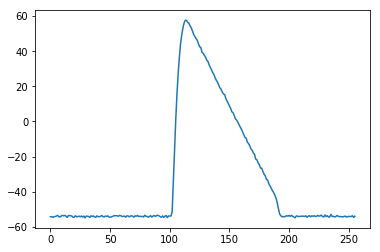

In [19]:
plt.plot(10*np.log10(spec))

In [21]:
np.sin(np.deg2rad(5))*15000

1307.3361412148724